
Logistic Regression on Original Data
C Value	Train Accuracy	Test Accuracy
0.0001	0.1981	0.1815
0.001	0.2942	0.2589
0.01	0.4185	0.3646
0.1	0.5080	0.3935
1	0.5440	0.3789
10	0.5608	0.3673
100	0.5660	0.3619


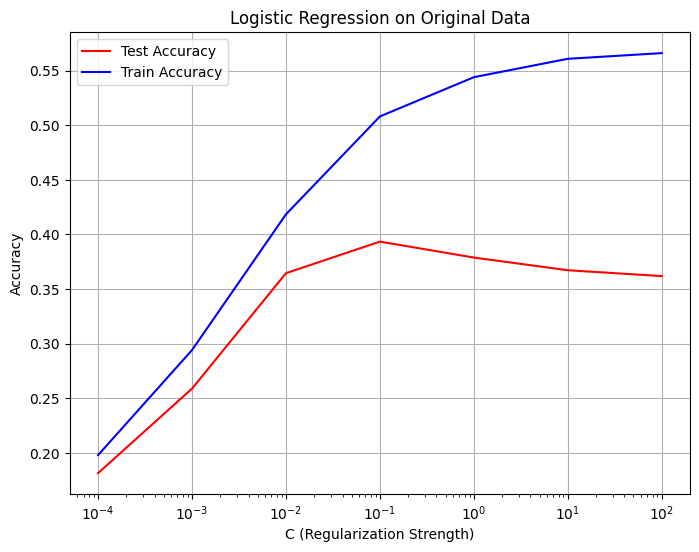

Best C value: 0.1 with Test Accuracy: 0.3935

Logistic Regression on Squared Features
C Value	Train Accuracy	Test Accuracy
0.0001	0.1771	0.1649
0.001	0.2624	0.2313
0.01	0.3959	0.3443
0.1	0.4929	0.3673
1	0.5421	0.3464
10	0.5593	0.3307
100	0.5641	0.3298


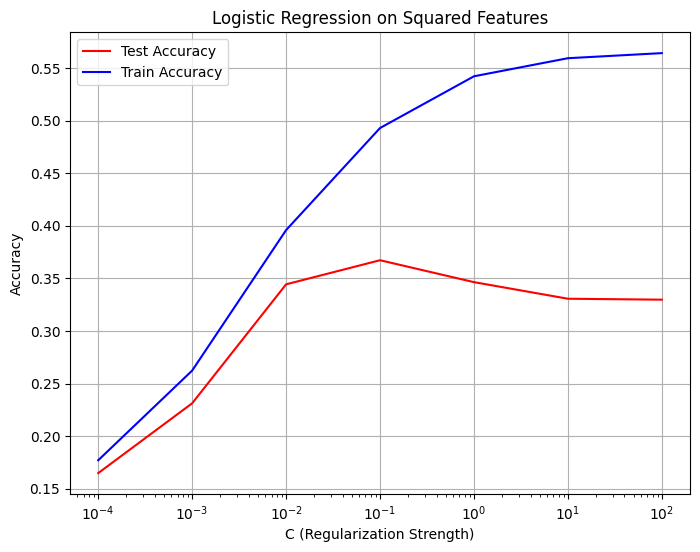

Best C value: 0.1 with Test Accuracy: 0.3673

Logistic Regression on Cubed Features
C Value	Train Accuracy	Test Accuracy
0.0001	0.1651	0.1562
0.001	0.2448	0.2176
0.01	0.3839	0.3223
0.1	0.4836	0.3500
1	0.5335	0.3307
10	0.5536	0.3193
100	0.5554	0.3080


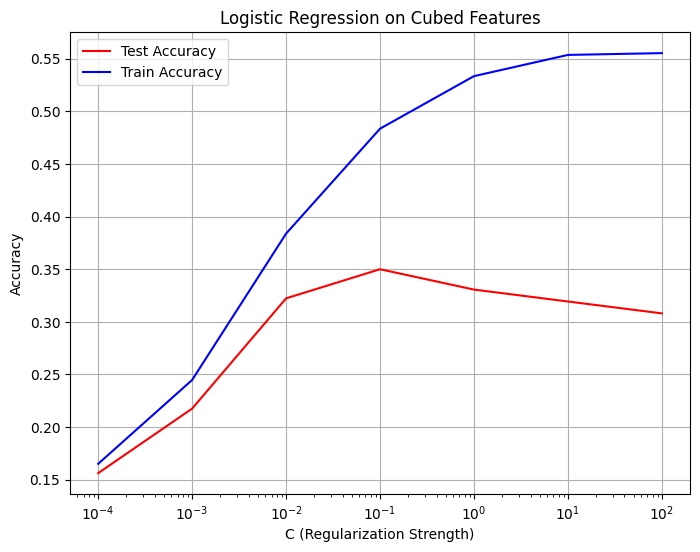

Best C value: 0.1 with Test Accuracy: 0.3500
Final Model Train Accuracy: 0.5080
Final Model Test Accuracy: 0.3935


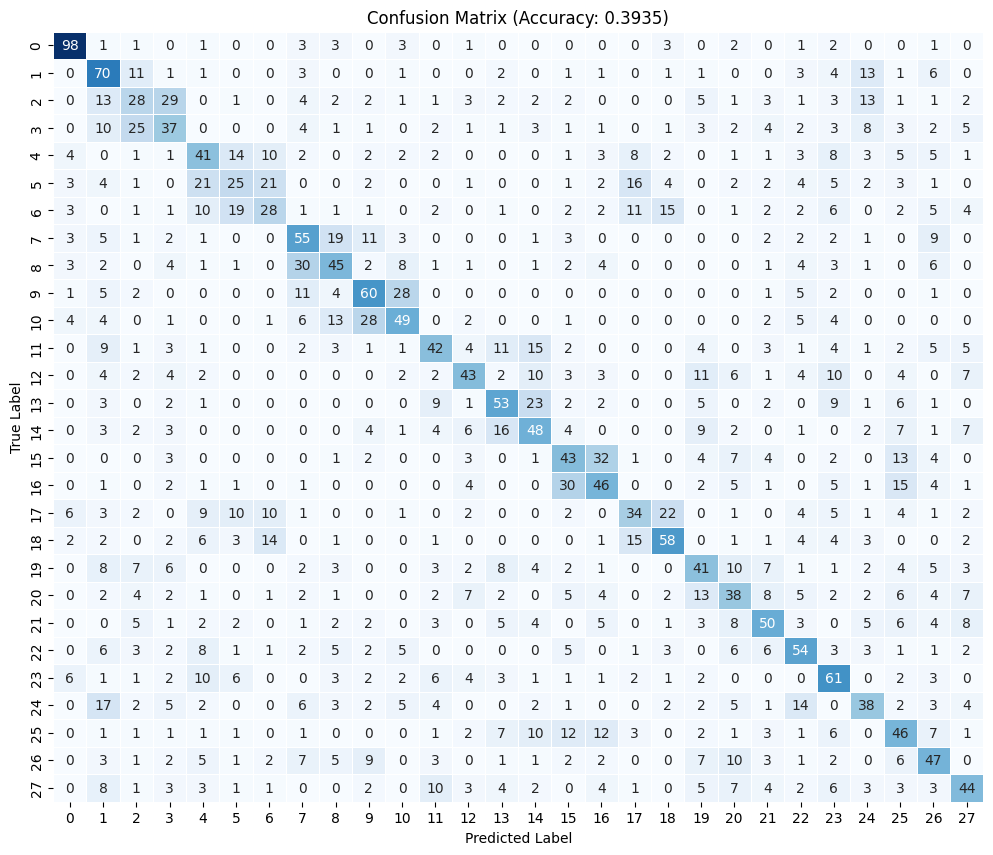

In [17]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load training and testing datasets
train_data = pd.read_csv("csvTrainImages 13440x1024.csv", header=None).values
train_label = pd.read_csv("csvTrainLabel 13440x1.csv", header=None).values.ravel()  # Flatten to 1D

test_data = pd.read_csv("csvTestImages 3360x1024.csv", header=None).values
test_label = pd.read_csv("csvTestLabel 3360x1.csv", header=None).values.ravel()  # Flatten to 1D

# Normalize data
train_data = train_data / 255.0
test_data = test_data / 255.0

# Regularization strength values for Logistic Regression
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Function to train and evaluate Logistic Regression for different regularization values
def evaluate_model(data_train, data_test, labels_train, labels_test, c_values, title):
    train_scores = []
    test_scores = []
    best_c = None
    best_test_accuracy = 0

    print(f"\n{title}")
    print("C Value\tTrain Accuracy\tTest Accuracy")

    for c in c_values:
        clf = LogisticRegression(C=c, penalty="l2", tol=0.1, max_iter=500, solver='liblinear')
        clf.fit(data_train, labels_train)

        train_accuracy = clf.score(data_train, labels_train)
        test_accuracy = clf.score(data_test, labels_test)

        train_scores.append(train_accuracy)
        test_scores.append(test_accuracy)

        # Track the best C value based on test accuracy
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_c = c

        print(f"{c}\t{train_accuracy:.4f}\t{test_accuracy:.4f}")

    # Plot accuracy vs. C values
    plt.figure(figsize=(8, 6))
    plt.plot(c_values, test_scores, "r-", label="Test Accuracy")
    plt.plot(c_values, train_scores, "b-", label="Train Accuracy")
    plt.xscale('log')  # Use logarithmic scale for better visualization
    plt.xlabel('C (Regularization Strength)')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Best C value: {best_c} with Test Accuracy: {best_test_accuracy:.4f}")
    return best_c, train_scores, test_scores

# Evaluate model on original data
best_c_original, train_scores_original, test_scores_original = evaluate_model(train_data, test_data, train_label, test_label, c_values, "Logistic Regression on Original Data")

# Evaluate model on squared features
best_c_squared, train_scores_squared, test_scores_squared = evaluate_model(train_data ** 2, test_data ** 2, train_label, test_label, c_values, "Logistic Regression on Squared Features")

# Evaluate model on cubed features
best_c_cubed, train_scores_cubed, test_scores_cubed = evaluate_model(train_data ** 3, test_data ** 3, train_label, test_label, c_values, "Logistic Regression on Cubed Features")

# Train final model with best regularization parameter from original data analysis
final_model = LogisticRegression(C=best_c_original, penalty="l2", tol=0.1, max_iter=500, solver='liblinear')
final_model.fit(train_data, train_label)

# Predict and evaluate
train_predictions = final_model.predict(train_data)
test_predictions = final_model.predict(test_data)

train_accuracy = accuracy_score(train_label, train_predictions)
test_accuracy = accuracy_score(test_label, test_predictions)

print(f"Final Model Train Accuracy: {train_accuracy:.4f}")
print(f"Final Model Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix for test data
conf_matrix = confusion_matrix(test_label, test_predictions)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Accuracy: {test_accuracy:.4f})")
plt.show()
